In [ ]:
!pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~p ~/.kaggle

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download biaiscience/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats
License(s): DbCL-1.0
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 dogs-vs-cats.zip  'image resized'   kaggle.json  '~p'	 sample_data   test   train


In [ ]:
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import os
path,dirs,files = next(os.walk('/content/train/train'))
file_count = len(files)
print(file_count)

25000


In [ ]:
file_names = os.listdir('/content/train/train')
print(file_names)

['cat.532.jpg', 'dog.7534.jpg', 'cat.10453.jpg', 'dog.1407.jpg', 'cat.372.jpg', 'cat.1732.jpg', 'cat.4802.jpg', 'cat.7393.jpg', 'cat.2701.jpg', 'cat.677.jpg', 'dog.7037.jpg', 'dog.5307.jpg', 'cat.453.jpg', 'cat.4327.jpg', 'cat.2384.jpg', 'cat.12480.jpg', 'cat.3157.jpg', 'dog.6946.jpg', 'dog.4996.jpg', 'dog.12288.jpg', 'dog.2855.jpg', 'cat.6230.jpg', 'cat.3541.jpg', 'dog.9469.jpg', 'dog.7940.jpg', 'cat.8769.jpg', 'cat.2195.jpg', 'dog.1906.jpg', 'cat.12325.jpg', 'dog.11427.jpg', 'cat.9242.jpg', 'dog.7243.jpg', 'dog.2467.jpg', 'dog.3909.jpg', 'cat.11116.jpg', 'dog.3039.jpg', 'dog.9268.jpg', 'dog.7778.jpg', 'cat.7586.jpg', 'cat.2835.jpg', 'dog.6061.jpg', 'dog.1041.jpg', 'dog.9219.jpg', 'cat.4011.jpg', 'dog.11259.jpg', 'dog.1423.jpg', 'cat.3293.jpg', 'cat.7003.jpg', 'dog.2588.jpg', 'cat.1523.jpg', 'cat.5100.jpg', 'dog.1957.jpg', 'cat.8895.jpg', 'cat.11101.jpg', 'cat.6691.jpg', 'dog.4597.jpg', 'dog.2955.jpg', 'cat.9461.jpg', 'dog.748.jpg', 'cat.2742.jpg', 'cat.3858.jpg', 'cat.2976.jpg', 'dog

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

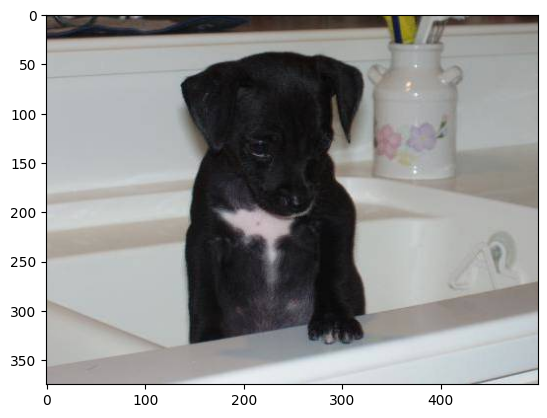

In [ ]:
img = mpimg.imread('/content/train/train/dog.8298.jpg')
plt.imshow(img)
plt.show()

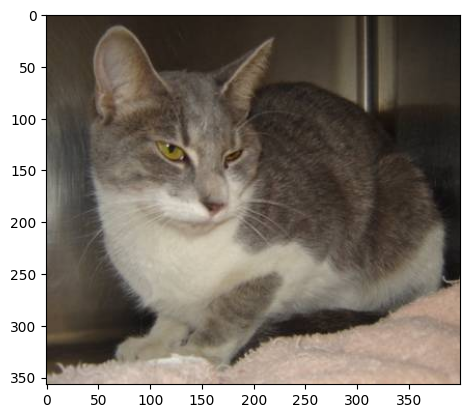

In [ ]:
img = mpimg.imread('/content/train/train/cat.4352.jpg')
plt.imshow(img)
plt.show()

In [ ]:
file_names= os.listdir('/content/train/train/')
for i in range(5):
  name = file_names[i]
  print(name[0:3])

cat
dog
cat
dog
cat


In [ ]:
file_names= os.listdir('/content/train/train/')
dog_count = 0
cat_count = 0
for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  elif name == 'cat':
    cat_count += 1
print(dog_count)
print(cat_count)

12500
12500


In [ ]:
os.mkdir('/content/image resized')

FileExistsError: [Errno 17] File exists: '/content/image resized'

In [ ]:
original_folder = '/content/train/train/'
resized_folder = '/content/image resized/'
for i in range(2000):
  filename= os.listdir(original_folder)[i]
  imgPath = original_folder+filename
  img = Image.open(imgPath)
  img = img.resize((224,224))
  img = img.convert('RGB')
  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [ ]:
filename = os.listdir('/content/image resized/')
labels = []
for i in range(2000):
  file_name = filename[i]
  if file_name[0:3] == 'dog':
    labels.append(1)
  else:
    labels.append(0)


In [ ]:
print(filename[0:5])
print(len(filename))

['cat.532.jpg', 'dog.7534.jpg', 'cat.10453.jpg', 'dog.1407.jpg', 'cat.372.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(filename))

[0, 1, 0, 1, 0]
2000


In [ ]:
values,counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1038  962]


In [ ]:
import cv2
import glob
image_directory = '/content/image resized/'
image_extension = ['png','jpg']
files = []
[files.extend(glob.glob(image_directory+ '*.' + e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

print(dog_cat_images)

[[[[167 182 191]
   [ 32  47  56]
   [ 31  47  59]
   ...
   [151 148 143]
   [134 131 126]
   [174 171 166]]

  [[156 171 180]
   [ 32  47  56]
   [ 39  55  67]
   ...
   [ 66  63  58]
   [ 48  45  40]
   [ 92  89  84]]

  [[165 179 191]
   [ 40  54  66]
   [ 39  55  68]
   ...
   [ 76  74  66]
   [ 54  52  44]
   [106 104  96]]

  ...

  [[ 44  70  94]
   [ 43  69  93]
   [ 42  68  92]
   ...
   [ 22  42  53]
   [ 34  54  65]
   [168 189 197]]

  [[ 96 122 139]
   [ 95 121 138]
   [ 95 121 138]
   ...
   [ 40  61  69]
   [ 50  71  79]
   [142 164 170]]

  [[212 239 253]
   [212 239 253]
   [213 239 253]
   ...
   [188 209 217]
   [182 204 210]
   [232 254 255]]]


 [[[ 48  63  66]
   [ 39  54  57]
   [ 29  46  49]
   ...
   [ 23  42  45]
   [ 24  43  46]
   [ 24  45  47]]

  [[ 52  67  70]
   [ 42  59  62]
   [ 35  52  55]
   ...
   [ 23  40  43]
   [ 23  42  45]
   [ 23  44  46]]

  [[ 49  66  69]
   [ 41  60  63]
   [ 37  56  59]
   ...
   [ 20  37  40]
   [ 21  40  43]
   [ 23  42

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
X_train_scaled =X_train/255
X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.37254902 0.44313725 0.44705882]
   [0.33333333 0.40392157 0.40784314]
   [0.36078431 0.41960784 0.42745098]
   ...
   [0.0745098  0.07843137 0.11764706]
   [0.23529412 0.24313725 0.28235294]
   [0.29411765 0.30196078 0.34117647]]

  [[0.37647059 0.44705882 0.45098039]
   [0.37647059 0.44705882 0.45098039]
   [0.4        0.45882353 0.46666667]
   ...
   [0.18039216 0.18431373 0.22352941]
   [0.20784314 0.21568627 0.25490196]
   [0.14901961 0.15686275 0.19607843]]

  [[0.38823529 0.45882353 0.45490196]
   [0.41960784 0.49019608 0.48627451]
   [0.4        0.4627451  0.45882353]
   ...
   [0.19215686 0.19607843 0.23529412]
   [0.18431373 0.18823529 0.22745098]
   [0.11372549 0.11764706 0.15686275]]

  ...

  [[0.56078431 0.51372549 0.59215686]
   [0.56862745 0.52156863 0.6       ]
   [0.58431373 0.54117647 0.61960784]
   ...
   [0.14117647 0.15294118 0.16862745]
   [0.16470588 0.16862745 0.18431373]
   [0.23137255 0.24313725 0.25882353]]

  [[0.54117647 0.49411765 0.57254902]
   [0.5

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)


num_of_classes = 2

model = tf.keras.Sequential([

  pretrained_model,
  tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [ ]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 5s 41ms/step - loss: 0.2304 - acc: 0.9013
Epoch 2/5
50/50 [==============================] - 3s 56ms/step - loss: 0.0748 - acc: 0.9744
Epoch 3/5
50/50 [==============================] - 2s 45ms/step - loss: 0.0593 - acc: 0.9794
Epoch 4/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0465 - acc: 0.9869
Epoch 5/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0408 - acc: 0.9881


In [ ]:
score,acc = model.evaluate(X_test_scaled,Y_test)
print('test score:',score)
print('test accuracy:',acc)

13/13 [==============================] - 1s 41ms/step - loss: 0.0764 - acc: 0.9775
test score: 0.07637752592563629
test accuracy: 0.9775000214576721


Path of the image to be predicted/content/cat.jpg


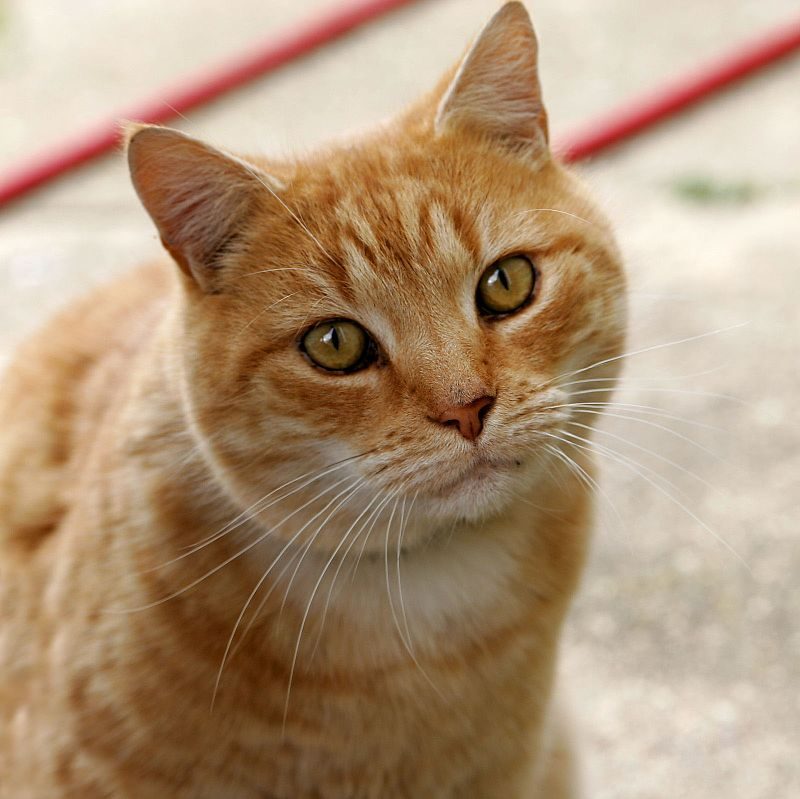

1/1 [==============================] - 1s 589ms/step
[[ 3.9829655 -5.2077117]]
0
The image is of a cat


In [ ]:
input_image_path = input('Path of the image to be predicted')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(224,224))
input_image_scaled = input_image_resize/255
input_image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 0:
  print('The image is of a cat')
else:
  print('The image is of a dog')